<a href="https://colab.research.google.com/github/bchuchucaa/Simulacion/blob/main/PruebaSimulacion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import random
import plotly.express as px
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd


# Generacion de numeros aleatorios

In [144]:
#Cuadrados medios
cuad_med_ran_num = []
xo = int(74731897457)
digitos = int(7)
iteraciones = int(100)
xn = xo
for i in range(iteraciones):
  xnn = xn**2
  txnn = str(xnn).zfill(8)
  tam = len(txnn)
  ui = int(txnn[int(tam/2-digitos/2):int(tam/2+digitos/2)])
  rn = ui / (int('9'*digitos)+1)
  cuad_med_ran_num.append(rn)
  xn = ui
  
cong_lineal_ramdom=[]
xo = int(7)
a = int(74731897457)
b = int(37747318974)
m = int(19)
iteraciones = int(100)
xn = xo

for i in range(iteraciones):
  xnn = (a*xn+b) % m
  ui = xnn/m
  cong_lineal_ramdom.append(ui)
  xn = xnn

random.seed(1032022)
py_rand_num = []
for i in range(100):
  x = random.uniform(0,1)
  py_rand_num.append(x)

# Transformacion a matriz y reemplazo por el umbral 0.5

In [238]:
def transform_to_matrix(array):
  array = np.array(array)
  matrix=array.reshape(10,10)
  matrix = np.where(matrix >= 0.5, 1,0)
  A = np.asarray(matrix).reshape(-1)
  Co=sum(A[i - 1] != A[i] for i in range(1, len(A)))
  ncero,nuno= np.count_nonzero(A == 0),np.count_nonzero(A == 1)
  graphics_pie(ncero,nuno,A)
  n=ncero+nuno
  return Co,ncero,nuno,n

# Comprobacion de la hipotesis

In [204]:
def comprobe(co,ncero,nuno,n):
  uco,oco,zo=0,0,0
  uco=((2*ncero*nuno)/n)+(1/2)
  oco=(2*ncero*nuno)*(2*ncero*nuno-n)/((n**2)*(n-1))
  zo=(co-uco)/oco
  print('ZO = ',zo)
  h = "Si cumple la hipotesis h0" if -1.96<zo and zo<1.96 else "No cumple"
  return h

Cuadrados medios

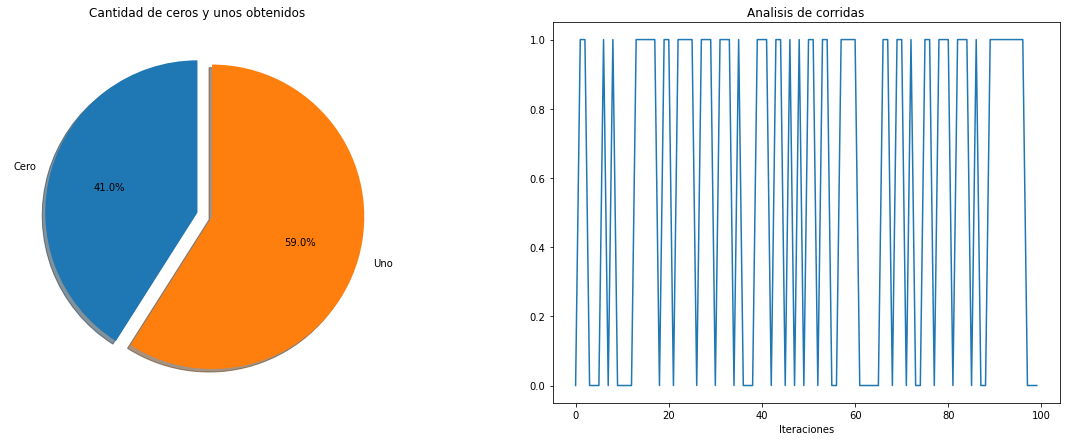

ZO =  -0.038006418512790456


'Si cumple la hipotesis h0'

In [257]:
co,no,n1,n=transform_to_matrix(cuad_med_ran_num)
comprobe(co,no,n1,n)

Congruencias lineales

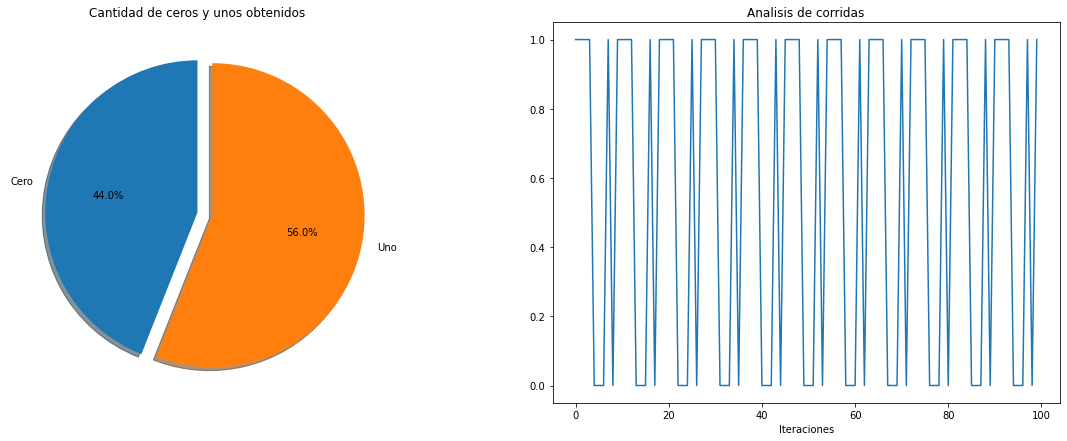

ZO =  -0.2405055331991952


'Si cumple la hipotesis h0'

In [256]:
co,no,n1,n=transform_to_matrix(cong_lineal_ramdom)
comprobe(co,no,n1,n)

Ramdom de python

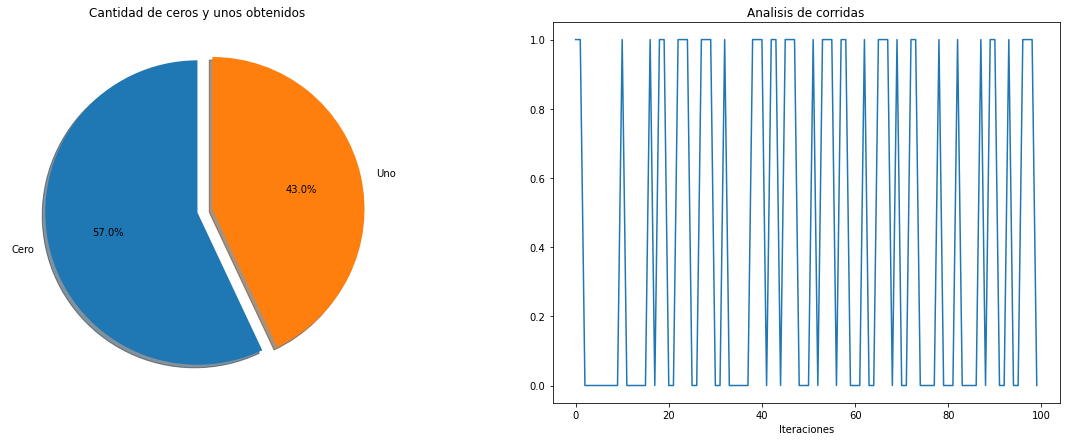

ZO =  -0.19009827096726845


'Si cumple la hipotesis h0'

In [255]:
co,no,n1,n=transform_to_matrix(py_rand_num)
comprobe(co,no,n1,n)

In [254]:
def graphics_pie(val0,val1,A):
  labels = 'Cero', 'Uno'
  sizes = [val0, val1]
  explode = (0, 0.1) 
  fig1, ax1 = plt.subplots(figsize=(20,7))
  ax1.axis('equal')
  plt.subplot(1,2,1)
  plt.title('Cantidad de ceros y unos obtenidos')
  plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90,explode=explode)
  plt.subplot(1,2,2)
  plt.title('Analisis de corridas')
  plt.xlabel("Iteraciones")
  label = list(range(0, 100))
  plt.plot(label, A, 0.40)
  plt.show()


# CONCLUSIONES
En este analisis se pudo demostrar satisfactoriamente la independencia de los numeros aleatorios generados mediante los metodos: cuadrados medios, congruencia lineal y random de python con resultados de:


1.   Cuadrados medios ZO= -0.038 porcentaje de 0=41% porcentaje de 1: 59%
2.   Congruencias lineales ZO= -0.240 porcentaje de 0=44% porcentaje de 1: 56%
3.   Random python ZO= -0.190 porcentaje de 0=57% porcentaje de 1: 43%

En este caso todos satisfacen la siguiente condicion:


1.   Cuadrados medios: -1.96 <-0.038 < 1.96
2.   Congruencias lineales: -1.96 <-0.240 < 1.96
3.   Python Random: -1.96 < -0.190 < 1.96


Por lo tanto se cumple la hipotesis 0:
Ho: los números del conjunto ri, son independientes